In [1]:
from DataLoader import load_data
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import re
import ast

In [2]:
df = pd.read_csv('test_dataset.csv')
def clean_bbox(bbox_str):
    clean_str = re.sub(r'[^\d,.]', '', bbox_str)
    bbox = tuple(map(float, clean_str.split(',')))
    return bbox

df['bbox'] = df['bbox'].apply(clean_bbox)

masked_images, images, masks, labels = load_data(df)
labels = labels - 1  # This will change labels to 0 and 1

Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png


In [6]:
masked_images.shape

(440, 256, 256, 3)

In [4]:
from tensorflow.keras.models import load_model

# Load the models
model_no_aug = load_model('BaseModel')
model_with_aug = load_model('AugmentationBaseModel')


In [7]:
# Predict probabilities
prob_no_aug = model_no_aug.predict(masked_images)  # vstack to create a batch from list
prob_with_aug = model_with_aug.predict(masked_images)

14/14 [==============================] - 73s 5s/step


In [9]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve for the model without augmentation
fpr_no_aug, tpr_no_aug, _ = roc_curve(labels, prob_no_aug.ravel())
auc_no_aug = auc(fpr_no_aug, tpr_no_aug)

# Compute ROC curve for the model with augmentation
fpr_with_aug, tpr_with_aug, _ = roc_curve(labels, prob_with_aug.ravel())
auc_with_aug = auc(fpr_with_aug, tpr_with_aug)


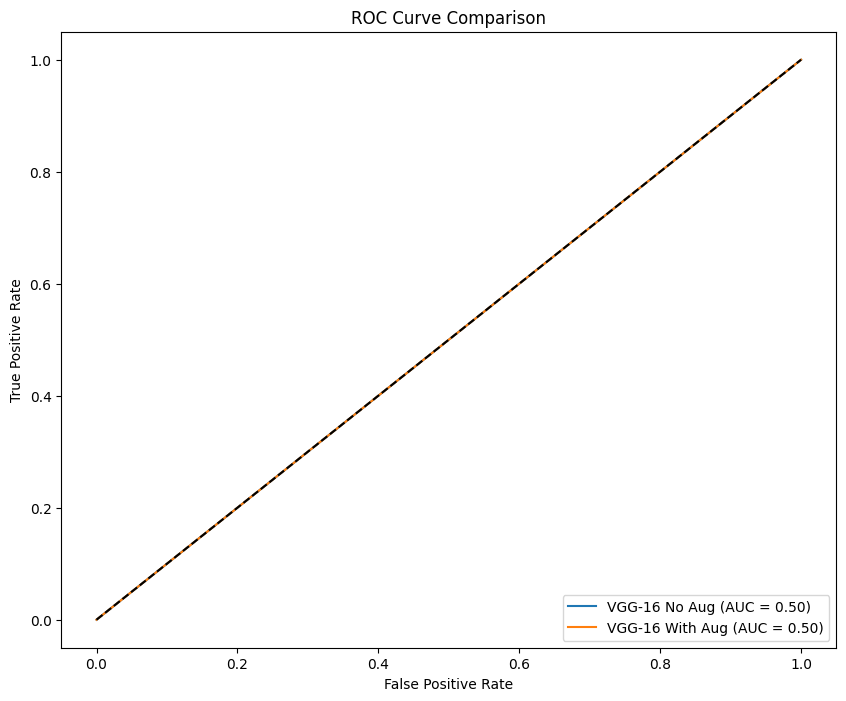

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(fpr_no_aug, tpr_no_aug, label=f'VGG-16 No Aug (AUC = {auc_no_aug:.2f})')
plt.plot(fpr_with_aug, tpr_with_aug, label=f'VGG-16 With Aug (AUC = {auc_with_aug:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()
